In [1]:
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /tmp/cell_image.zip

--2019-05-24 09:17:40--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/tmp/cell_image.zip’

/tmp/cell_image.zip 100%[===================>] 337.08M   106MB/s    in 3.2s    

2019-05-24 09:17:48 (106 MB/s) - ‘/tmp/cell_image.zip’ saved [353452851/353452851]



In [1]:
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/malaria_cell_classification_code.zip \
    -O /tmp/malaria_cell_classification_code.zip

--2019-05-24 09:19:12--  https://ceb.nlm.nih.gov/proj/malaria/malaria_cell_classification_code.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12581 (12K) [application/zip]
Saving to: ‘/tmp/malaria_cell_classification_code.zip’

/tmp/malaria_cell_c 100%[===================>]  12.29K  --.-KB/s    in 0s      

2019-05-24 09:19:12 (99.9 MB/s) - ‘/tmp/malaria_cell_classification_code.zip’ saved [12581/12581]



In [0]:
import os
import zipfile

local_zip = '/tmp/cell_image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cell_image')
local_zip = '/tmp/malaria_cell_classification_code.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/malaria_cell_classification_code')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_parasitized_dir = os.path.join('/tmp/cell_image/cell_images/Parasitized')
train_uninfected_dir = os.path.join('/tmp/cell_image/cell_images/Uninfected')

In [5]:
train_parasitized_names = os.listdir(train_parasitized_dir)
print(train_parasitized_names[:10])

train_uninfected_names = os.listdir(train_uninfected_dir)
print(train_uninfected_names[:10])

['C180P141NThinF_IMG_20151201_163751_cell_157.png', 'C91P52ThinF_IMG_20150821_125256_cell_2.png', 'C59P20thinF_IMG_20150803_115303_cell_24.png', 'C176P137NThinF_IMG_20151201_122444_cell_118.png', 'C137P98ThinF_IMG_20151005_162010_cell_78.png', 'C136P97ThinF_IMG_20151005_140538_cell_99.png', 'C176P137NThinF_IMG_20151201_122811_cell_169.png', 'C137P98ThinF_IMG_20151005_161659_cell_2.png', 'C184P145ThinF_IMG_20151203_102543_cell_178.png', 'C116P77ThinF_IMG_20150930_172112_cell_105.png']
['C226ThinF_IMG_20151112_131622_cell_148.png', 'C220ThinF_IMG_20151106_154533_cell_113.png', 'C118P79ThinF_IMG_20151002_105346_cell_119.png', 'C167P128ReThinF_IMG_20151201_110011_cell_182.png', 'C210ThinF_IMG_20151029_162934_cell_22.png', 'C141P102ThinF_IMG_20151005_214338_cell_119.png', 'C231ThinF_IMG_20151112_153041_cell_35.png', 'C205ThinF_IMG_20151106_151800_cell_134.png', 'C48P9thinF_IMG_20150721_160406_cell_194.png', 'C185P146ThinF_IMG_20151203_110933_cell_111.png']


In [6]:
print('total training Parasitized images:', len(os.listdir(train_parasitized_dir)))
print('total training Uninfected images:', len(os.listdir(train_uninfected_dir)))

total training Parasitized images: 13780
total training Uninfected images: 13780


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

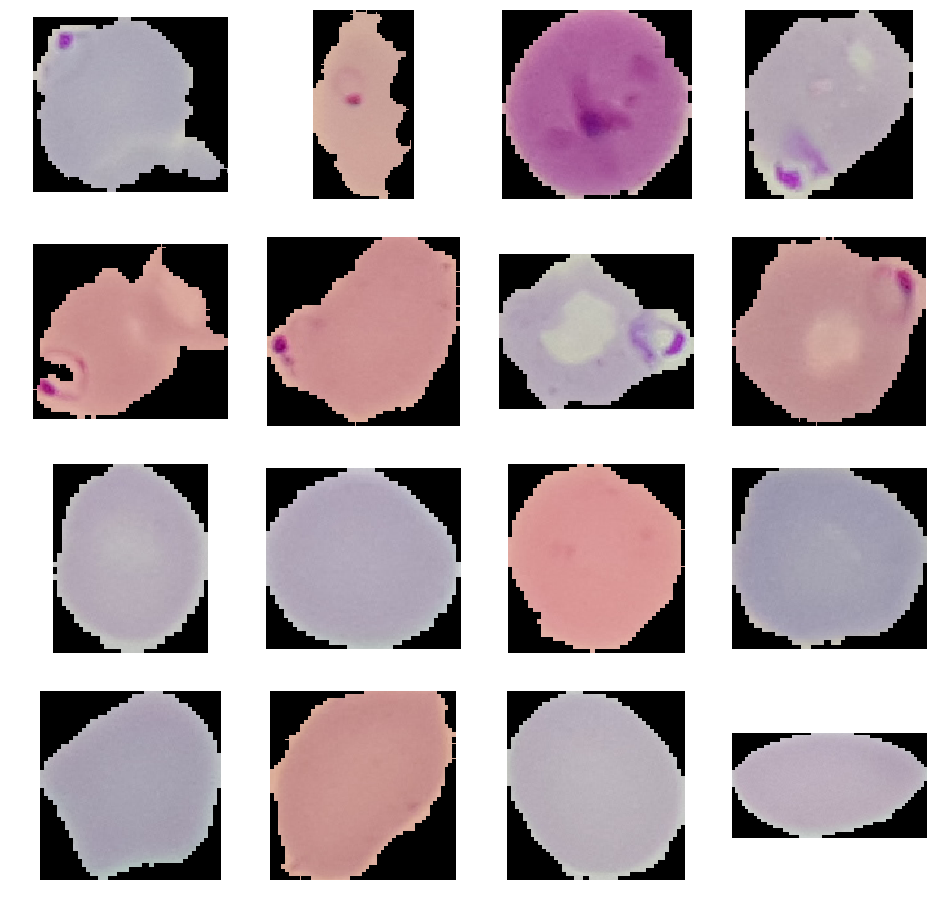

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_parasitized_pix = [os.path.join(train_parasitized_dir, fname) 
                for fname in train_parasitized_names[pic_index-8:pic_index]]
next_uninfected_pix = [os.path.join(train_uninfected_dir, fname) 
                for fname in train_uninfected_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_parasitized_pix+next_uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1/255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/cell_image/cell_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
train_generator = train_datagen.flow_from_directory(
        '/tmp/cell_image/cell_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
44/44 [==============================] - 24s 537ms/step - loss: 0.7298 - acc: 0.5111
Epoch 2/15
44/44 [==============================] - 20s 463ms/step - loss: 0.7479 - acc: 0.5612
Epoch 3/15
44/44 [==============================] - 21s 469ms/step - loss: 0.4337 - acc: 0.8214
Epoch 4/15
44/44 [==============================] - 21s 470ms/step - loss: 0.2428 - acc: 0.9169
Epoch 5/15
44/44 [==============================] - 21s 469ms/step - loss: 0.2008 - acc: 0.9263
Epoch 6/15
44/44 [==============================] - 20s 459ms/step - loss: 0.1718 - acc: 0.9396
Epoch 7/15
44/44 [==============================] - 21s 476ms/step - loss: 0.1570 - acc: 0.9439
Epoch 8/15
44/44 [==============================] - 21s 479ms/step - loss: 0.1427 - acc: 0.9479
Epoch 9/15
44/44 [==============================] - 21s 482ms/step - loss: 0.1318 - acc: 0.9495
Epoch 10/15
44/44 [==============================] - 21s 479ms/step - loss: 0.1232 - acc

In [17]:
history.history

{'acc': [0.5110708,
  0.5611615,
  0.8214156,
  0.9168784,
  0.9263158,
  0.9395644,
  0.94392014,
  0.9479129,
  0.9495463,
  0.9519056,
  0.9551724,
  0.9529946,
  0.9629764,
  0.9656987,
  0.9655172],
 'loss': [0.7305231397251468,
  0.7490567414816841,
  0.42884139242276087,
  0.23615367663534065,
  0.19488716199047554,
  0.17020066273948026,
  0.15901542965545845,
  0.14492862149532174,
  0.1333058564597487,
  0.1247739956391377,
  0.1109397931872933,
  0.12795263611037155,
  0.09297968148225969,
  0.088907290303221,
  0.0824958172062253]}

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Uninfected")
  else:
    print(fn + " is a Paracitizied")

Saving C99P60ThinF_IMG_20150918_142334_cell_46.png to C99P60ThinF_IMG_20150918_142334_cell_46.png
[0.]
C99P60ThinF_IMG_20150918_142334_cell_46.png is a Paracitizied
